**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [3]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [12]:
params = {
    'max_depth':[3,6,9,12],
    'n_estimators':[10,50,100,200]
}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [13]:
from sklearn.model_selection import GridSearchCV

In [15]:
grid_cv = GridSearchCV(rf, param_grid=params, scoring='roc_auc',
                  n_jobs=None, iid=False, refit=True, cv=4, verbose=2,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [16]:
grid_cv.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=10, total=   1.0s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s



[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.5s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.5s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.5s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.5s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .................... max_depth=3, n_estimators=100, total=   1.1s
[CV] 

[CV] ................... max_depth=12, n_estimators=200, total=   6.6s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   6.4s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   6.6s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   6.5s


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  2.4min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=0, warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'max_depth': [3, 6, 9, 12]

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [17]:
grid_cv_results_df = pd.DataFrame(grid_cv.cv_results_)
grid_cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.245135,0.169422,0.115029,0.181316,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.739013,0.746599,0.772127,0.771322,0.757265,0.014709,16,0.767014,0.767158,0.760550,0.763683,0.764601,0.002721
1,0.519701,0.006303,0.019567,0.006841,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.748097,0.755878,0.779465,0.771250,0.763673,0.012351,12,0.775168,0.774025,0.765732,0.766947,0.770468,0.004171
2,1.065143,0.043468,0.042976,0.012953,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.747239,0.753930,0.779195,0.770934,0.762825,0.012804,13,0.774328,0.773591,0.766101,0.766914,0.770233,0.003746
3,2.219108,0.116459,0.092190,0.023874,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.747537,0.753062,0.777636,0.771726,0.762490,0.012522,14,0.774495,0.773528,0.766138,0.767397,0.770389,0.003665
4,0.179525,0.006518,0.011714,0.006763,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.753591,0.758904,0.779991,0.774043,0.766632,0.010761,11,0.796103,0.796476,0.793736,0.796439,0.795689,0.001136
5,0.968019,0.045798,0.019512,0.006771,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.760059,0.765192,0.787767,0.778666,0.772921,0.010938,8,0.807033,0.805090,0.799392,0.801294,0.803202,0.003016
6,1.913738,0.127447,0.046851,0.000034,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.760920,0.765498,0.788163,0.779138,0.773430,0.010829,6,0.808139,0.806127,0.800872,0.803105,0.804561,0.002783
7,4.090073,0.333000,0.097640,0.006734,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.761425,0.765266,0.787587,0.779786,0.773516,0.010625,5,0.808149,0.806852,0.800685,0.804014,0.804925,0.002869
8,0.270786,0.009169,0.011818,0.003805,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.760485,0.755891,0.779287,0.774066,0.767432,0.009566,10,0.851831,0.854940,0.849544,0.851191,0.851877,0.001955
9,1.360858,0.031872,0.035358,0.007137,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.766217,0.765184,0.785572,0.779758,0.774183,0.008735,4,0.867995,0.871719,0.868006,0.867375,0.868773,0.001719


In [18]:
grid_cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

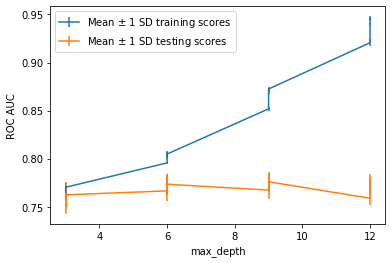

In [19]:

ax = plt.axes()
ax.errorbar(grid_cv_results_df['param_max_depth'],
            grid_cv_results_df['mean_train_score'],
            yerr=grid_cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(grid_cv_results_df['param_max_depth'],
            grid_cv_results_df['mean_test_score'],
            yerr=grid_cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.show()

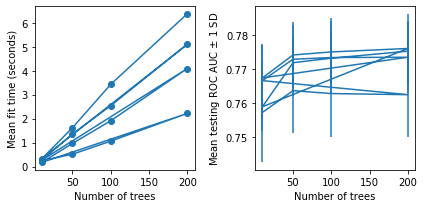

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(grid_cv_results_df['param_n_estimators'],
            grid_cv_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(grid_cv_results_df['param_n_estimators'],
                grid_cv_results_df['mean_test_score'],
                yerr=grid_cv_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

**Find the best hyperparameters from the cross-validation.**

In [21]:
grid_cv.best_params_

{'max_depth': 9, 'n_estimators': 200}

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [22]:
# Create a 5x5 grid
x_coordi, y_coordi = np.meshgrid(range(5), range(5))
z_coordi = grid_cv_results_df.mean_test_score.values.reshape(4,4)
print(x_coordi)
print(y_coordi)
print(z_coordi)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
[[0.75726514 0.76367254 0.76282451 0.7624904 ]
 [0.7666323  0.77292127 0.77342974 0.77351586]
 [0.76743236 0.77418286 0.77507982 0.77609586]
 [0.75892342 0.77190845 0.77323027 0.77530929]]


In [23]:
# Set color map to `plt.cm.jet`
color_map = plt.cm.jet

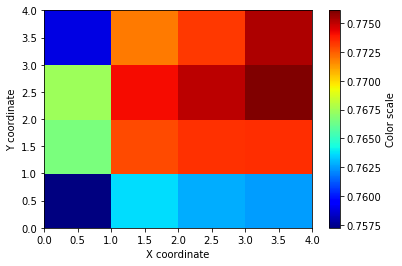

In [24]:
# Visualize pcolormesh
ax = plt.axes()

pcolor_ex = ax.pcolormesh(x_coordi, y_coordi, z_coordi, cmap = color_map)

plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
plt.show()

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [25]:
# Create a dataframe of the feature names and importance
feature_importance_df = pd.DataFrame({
    'Feature Name': features_response[:-1],
    'Importance': grid_cv.best_estimator_.feature_importances_
})

In [26]:
# Sort values by importance
feature_importance_df.sort_values("Importance", ascending = False)

,Feature Name,Importance
4,PAY_1,0.433321
0,LIMIT_BAL,0.061144
11,PAY_AMT1,0.060166
12,PAY_AMT2,0.047341
5,BILL_AMT1,0.043085
13,PAY_AMT3,0.042350
6,BILL_AMT2,0.041451
7,BILL_AMT3,0.037690
10,BILL_AMT6,0.034485
8,BILL_AMT4,0.034127
